In [1]:
import cv2
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from functions import createAnySymmetry,getSmoothNoiseSin

<h2>Color gradient</h2>

[Tutorial](https://note.nkmk.me/en/python-numpy-generate-gradation-image/)

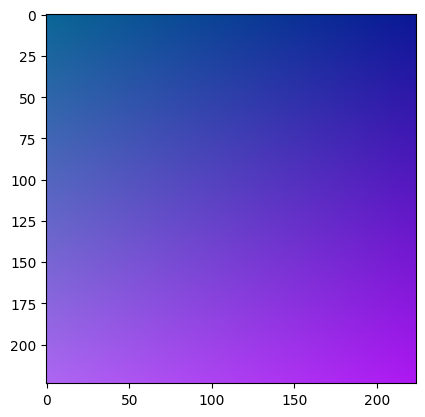

In [2]:
def get_gradient_line(start, stop, width, height, is_horizontal):
    if is_horizontal:
        return np.tile(np.linspace(start, stop, width), (height, 1))
    else:
        return np.tile(np.linspace(start, stop, height), (width, 1)).T

def get_gradient(width, height, start_list = None, stop_list = None, is_horizontal_list = None):
    if start_list is None:
        start_list = (random.randrange(255), random.randrange(255), random.randrange(255))
    if stop_list is None:
        stop_list = (random.randrange(255), random.randrange(255), random.randrange(255))
    if is_horizontal_list is None:
        is_horizontal_list = (random.getrandbits(1), random.getrandbits(1), random.getrandbits(1))
    result = np.zeros((height, width, len(start_list)), dtype=np.uint8)

    for i, (start, stop, is_horizontal) in enumerate(zip(start_list, stop_list, is_horizontal_list)):
        result[:, :, i] = get_gradient_line(start, stop, width, height, is_horizontal)

    return result

grad = get_gradient(224,224)
plt.imshow(grad)

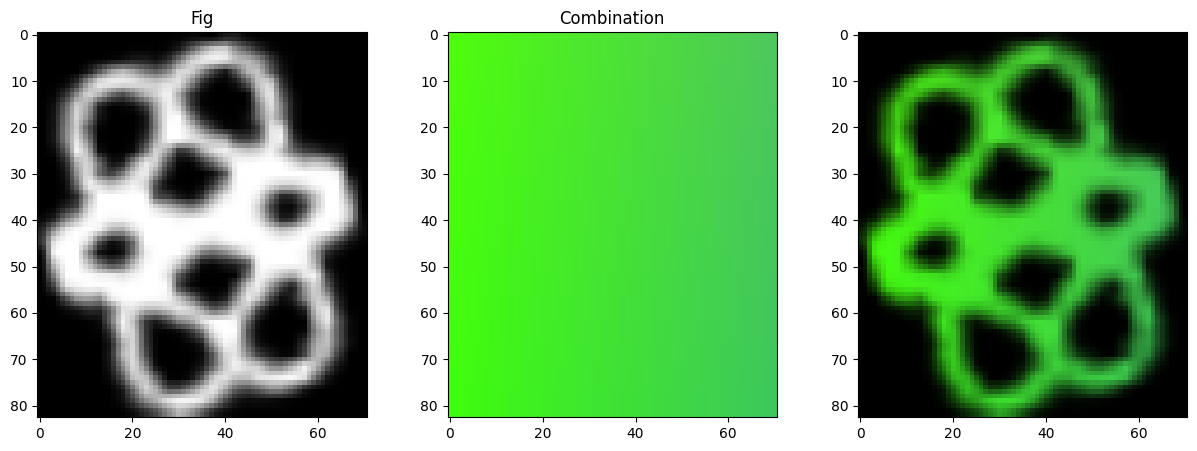

In [3]:
# Reading the database
mnist = pd.read_csv('MNIST/mnist_test.csv')

img, _ = createAnySymmetry(random.randint(0,10000), mnist, ['simple', 'cross'], [0.5, 0.5])
grad = get_gradient(img.shape[1],img.shape[0])
norm = grad/255
comb = np.multiply(img,norm)
comb = comb.astype(np.uint8)

_, ax = plt.subplots(1,3, figsize=(15, 5))
ax[0].imshow(img), ax[0].set_title(f'Fig')
ax[1].imshow(grad), ax[1].set_title(f'Grad')
ax[2].imshow(comb), ax[1].set_title(f'Combination')
plt.show()

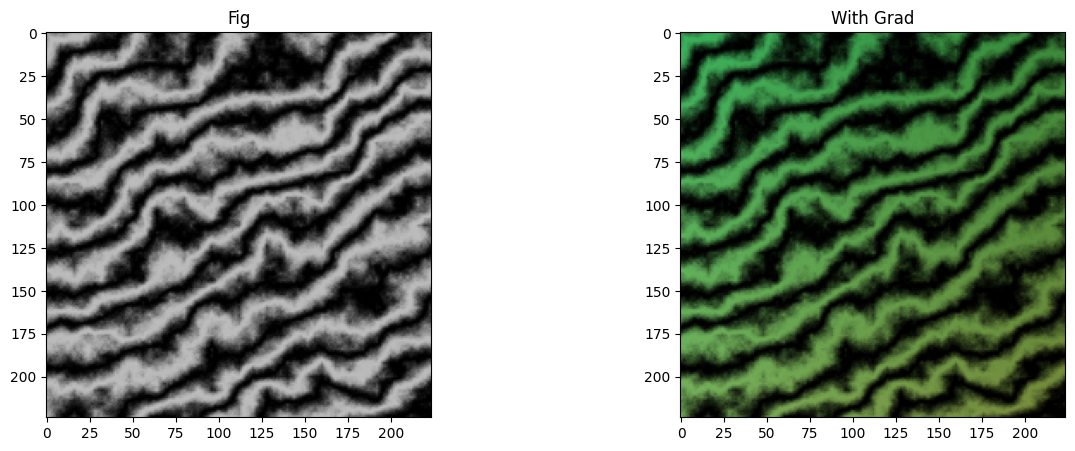

In [8]:
# Applies random color gradient to given image
def applyColorGradient(image, start=None, end=None, axes=None):
    grad = get_gradient(image.shape[1],image.shape[0], start_list=start, stop_list=end, is_horizontal_list=axes)
    norm = grad/255
    image = np.multiply(image,norm)
    image = image.astype(np.uint8)

    return image

back,_ = getSmoothNoiseSin((224,224,3))
disp = back.copy()
disp = applyColorGradient(disp)

_, ax = plt.subplots(1,2, figsize=(15, 5))
ax[0].imshow(back), ax[0].set_title(f'Fig')
ax[1].imshow(disp), ax[1].set_title(f'With Grad')
plt.show()